# COGS 118B - Final Project

# American Sign Language Recognition

# Names

- Allen Phu
- Kevin Yu
- Saksham Rai
- Rodrigo Lizaran-Molina

# Abstract 
Utilizing a dataset of many characters in American Sign Language, we thought it would be interesting to apply many of the clustering techniques taught in this course to generate clusters of the ASL characters. From there, upon the models being be optimized enough, we believed that when using a web camera to create our own signs, the model will be able to correctly assign it to a cluster and return the character. The data is represented as a vector of pixel intensities that range from 0-255 (single dimensional as it is greyscale). With this, we have run various clustering algorithms on the greyscale images and our writeup goes into detail explaining the analysis and our choice of model selection and hypterparameters. However, since our data also contains labels to classify each entry, our writeup explores the comparisson of our unsupervised learning models to supervised models trained on the same dataset. We were curious to see if the local and global relationships in our dataset could be distinctly extracted by unsupervised learning models or perhaps, see if this task is better suited for supervised learning models that can optimize their parameters with feedback from the labeled data during training. To measure performance, we have allocated a portion of the dataset for testing and based on the proportion of correct classifications vs incorrect classifications, we can obtain an accuracy percentage. This paper delves into the findings and methodologies of our application of both unsupervised and supversived learning on the dataset. 

 

# Background

Our group originally came across Google’s “American Sign Language Fingerspelling Recognition” Kaggle competition <a name="one"></a>[<sup>[1]</sup>](#onenote) while brainstorming for ideas for our project. We were intrigued by this idea as we were all interested in ML image processing in the first place, but the combination of making advancements in accessibility and image processing only solidified this topic as something we wanted to pursue for our final project. 


After some further research, we realized that although we were intrigued by the idea of mixing ML and ASL together, only one of us had prior experience with the MediaPipe library. As many prior writeups regarding the utilization of ML utilized the aforementioned MediaPipe library <a name="two"></a>[<sup>[2]</sup>](#twonote) <a name="three"></a>[<sup>[3]</sup>](#threenote), we decided to pivot towards the Sign Language MNIST dataset <a name="four"></a>[<sup>[4]</sup>](#fournote) in order to make the project more digestible for ourselves. Previous studies have shown that using image recognition platforms in order to recognize ASL have already been successful, with an October 2023 study achieving 98.98% test accuracy <a name="five"></a>[<sup>[5]</sup>](#fivenote) and an August 2022 study utilizing MediaPipe, Keras, and the Sign Language MNIST dataset achieving 95% training accuracy <a name="three"></a>[<sup>[3]</sup>](#threenote). 


Regarding advancements in what’s been done for machine learning and ASL detection, Google has launched Project Shuwa in the past in order to bring awareness and teach more people about ASL <a name="two"></a>[<sup>[2]</sup>](#twonote). One (of many components) of Project Shuwa is SignTown, an “interactive game that utilizes webcams and a web browser to help people learn about sign language and Deaf culture” <a name="two"></a>[<sup>[2]</sup>](#twonote). Google has also made it easier to learn about both ASL and machine learning through the utilization of their “Teachable Machine” tool, where people can use a no-code approach to leverage machine learning to test a model’s ability to recognize ASL samples <a name="six"></a>[<sup>[6]</sup>](#sixnote).

# Problem Statement

The problem we are aiming to solve is the classification of American Sign Language Characters to provide an ability of communication from deaf people to those who do not understand ASL. More specifically, we are looking to compare and contrast the efficacy between Supervised and Unsupervised classification machine learning algorithms. For the purpose of this project, we have decided 2 unsupervised clustering algorithms: Gaussian Mixture Model and K-Means clustering and 2 supervised models: Computational Neural Networks and Support Vector Machine algorithms. These models are picked because of their implementation and their common application in image recognition tasks, which aligns with the nature of the ASL dataset. 


With the 27,455 available training data samples and 7172 samples allocated for testing, we are looking to measure the success of each model with different evaluation metrics (specific to each classification model). In addition to this, we also test the accuracy of our clusters by inputting test cases from making the signs on our webcams and observing if the results share a similar accuracy with the test data. This can be replicated as with the publicly available data - which in our case comes from the Google Open Teachable Machine, which is used as our benchmark model.

# Data

- Our data will be composed of hand images. Each image will represent a letter of the American Sign Language.
- Sign_mnist_test and Sign_mnist_train
    - [Link](https://www.kaggle.com/datasets/datamunge/sign-language-mnist/data)
    - 1570 variables/columns (785 each one) with 27455 observations in training data and 7172 observations in test data.
    - Each of the 27455 observations represent an image and it is paired with a corresponding label on what hand sign the sample represents
    - The images are represented as 784 pixels and each pixel ranges from 0-255 and these images are represented as greyscale versions of themselves
    - There will not be any special handling/transformations for this data as we can immediately begin clustering with the numeric data values stored in each row

### Video demostration
- [Video](https://drive.google.com/file/d/1B8pK6kC_L6N77hL29prMd8H7gnXqXOuY/view?usp=sharing)

# Proposed Solution

To solve the problem of clustering ASL (American Sign Language) hand sign images using unsupervised machine learning, supervised machine learning and achieving high accuracy in real-time sign language interpretation through a camera, we have employed the following solution:

***Solution Description***

1. Preprocessing:
    - Resize images to a consistent dimension to ensure uniformity.
    - Transform pixel values into 1D array for each image.

2. Feature Extraction:
    - Utilize a dimensionality reduction technique PCA, to extract essential features and reduce computational complexity.

3. Unsupervised and Supervised Clustering:
    - Apply clustering algortihm such as k-means, GMM, CNN to group similar hand sign images together. (The choice of k can be determined by an Elbow method or Silhouette Score)
    - Apply SVM and TensorFlow (Supervised Machine Learning)to correctly predict the sign language and compared accuracy against Unsupervised Methods.

4. Cluster Label Assigment:
    - Assign labels to the clusters based on the majority class of the images within each cluster. (Unsupervised Method)
    - Using ground truth labels for our SVM and TensorFlow model.

5. Real-time Sign Language Interpretation:
    - Use a camera to capture frames in real-time.
    - Preprocess each frame similarly to the training data.
    - Apply the trained clustering model to assign a cluster label to the current frame.
    - Map the cluster label to the corresponding ASL letter using the assigned labels from the training phase.

6. Testing and Validation:
    - Split the dataset into training and testing sets to evaluate the model's performance.
    - Use metrics like accuracy, precision, recall, and F1-score to assess the clustering model's performance on the testing set.
    - For real-time interpretation, validate the accuracy by comparing the predicted letters to the ground truth ASL letters in a controlled environment.

7. Benchmark Model:
    - Google open Teachable Machine<a name="MLTeaching"></a>[<sup>[7]</sup>](#MLTeachingNote) allow to upload a video or photos of our hands making the ASL, it will train a TensorFlow model and print out accuracy of each class. This model has being imported into test.py to predict in real-life hand sign throw the webcam. Below, we have embeded the accuracy per class and the accuracy of epoch from the benchmark.

    > <img src="data/img/Accuracy per Class.PNG" alt="Image 1" style="width: 38%; float: left; margin-right: 5%;">
    > <img src="data/img/Accuracy per epoch.PNG" alt="Image 2" style="width: 40%; float: left;">

***Implementation Details***
- Libraries: 
    - Use popular machine learning libraries such as scikit-learn and tensorflow for clustering algorithms, OpenCV for image processing, and NumPy for numerical operations.

- Function Calls:
    - Use scikit-learn's implementation of K-means and other clustering algorithms.
    - Apply PCA for dimensionality reduction using scikit-learn's PCA module.

- Real-time Integration:
    - Utilize OpenCV for capturing and processing camera frames.
    - Implement a real-time loop to continuously process frames and display the predicted ASL letters.

# Evaluation Metrics

Since our project mainly focuses on clustering algorithms to identify similar features between different ASL hand sign images, we need to check how efficient our algorithm is in forming these clusters, and how distinct they are from other clusters. To achieve this, the best feature to use is the Adjusted Rand Score. Adjusted Rand Score is a measure of similarity between two clusterings, particularly focusing on pairs that are in agreement - belonging either to different or the same clusters. The score is a ratio of the number of agreeing pairs to the total number of pairs, giving a value between 0 (no agreement) and 1 (perfect agreement). In contrast to the Rand Score, the Adjusted Rand Score, as the name suggests “adjusts” the random score by accounting for clustering by chance. It does this by assigning close to 0 values to random clusterings and 1 for perfect matches. 

Beyond this, we will also test the model using traditional classification metrics in an adapted manner. After clustering, we assign the most common true label within each cluster to all its points, enabling us to apply metrics like accuracy, precision, recall, and the F1 score. This will be done to test the model for its accuracy in producing true and false positives/negatives. 

In addition to this, we will test our model's accuracy to handle real-time hand-sign interpretations. Non-informative ASL communicators will stand in front of the webcam and make one of the many signs. The model will predict the hand sign. This can be done by displaying the model's prediction on a screen in real time or logging the results for later analysis. We will compare the model's real-time predictions with the actual signs being performed to assess accuracy. 

# Results/Discussion

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Main Takeaways
After working through this project, we've realized that, ultimately, unsupervised algorithms were not that great for this dataset. This checks out with what we suspected before we began: unsupervised algorithms perform far worse than supervised algorithms for image recognition. 

While our supervised models such as SVM and CNN gave us great results, our unsupervised algorithms such as Gaussian Mixture Models and K-Means gave us poor performance. Unsurprisingly, the CNN gave us the best performance, with SVM coming in at second. This was expected, as CNN algorithms already have a reputation for being strong algorithms for image processing.



## All Library Imports

In [1]:
# basic data utils
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
pal = sns.color_palette("hls", 10)

# Dimension reduction and clustering tools
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.svm import SVC

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Metrics for how good a clustering does
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, classification_report, silhouette_score, accuracy_score, rand_score, confusion_matrix

In [2]:
train = pd.read_csv("data/sign_mnist_train.csv")
test = pd.read_csv("data/sign_mnist_test.csv")

# Analysis

We decided to do some previous analysis of our data to give us an idea of what we are working with

In [3]:
print(f'Shape of train data: {train.shape}')
print(f'Shape of test data: {test.shape}')

label_test = test['label']
label_train = train['label']
train_data = train.drop('label',axis=1)
test_data = test.drop('label',axis=1)

# Display descriptive statistics for train dataset
print(f'Train descriptive stats {train.label.describe()}')
# Display descriptive statistics for test dataset
print(f'\nTest descriptive stats {test.label.describe()}')

Shape of train data: (27455, 785)
Shape of test data: (7172, 785)
Train descriptive stats count    27455.000000
mean        12.318813
std          7.287552
min          0.000000
25%          6.000000
50%         13.000000
75%         19.000000
max         24.000000
Name: label, dtype: float64

Test descriptive stats count    7172.000000
mean       11.247351
std         7.446712
min         0.000000
25%         4.000000
50%        11.000000
75%        18.000000
max        24.000000
Name: label, dtype: float64


Our data for the "train" and "test" have very similar values. The only difference is the quantity of rows in each data. This make sense since our train data has to be bigger than our test data to train our models.

Below, we can visualize the distribution of both datasets

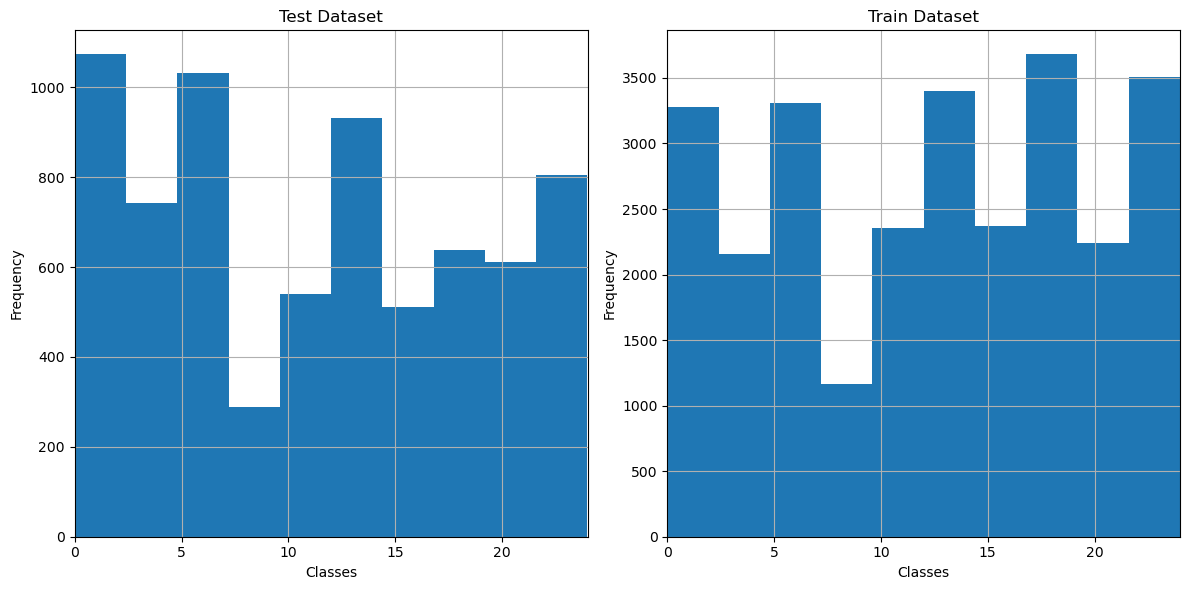

In [4]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram and display descriptive statistics for test dataset
test.label.hist(ax=axes[0])
axes[0].set_title('Test Dataset')
axes[0].set_xlabel('Classes')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0,24)
axes[0].grid(True)

# Plot histogram and display descriptive statistics for train dataset
train.label.hist(ax=axes[1])
axes[1].set_title('Train Dataset')
axes[1].set_xlabel('Classes')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(0,24)
axes[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

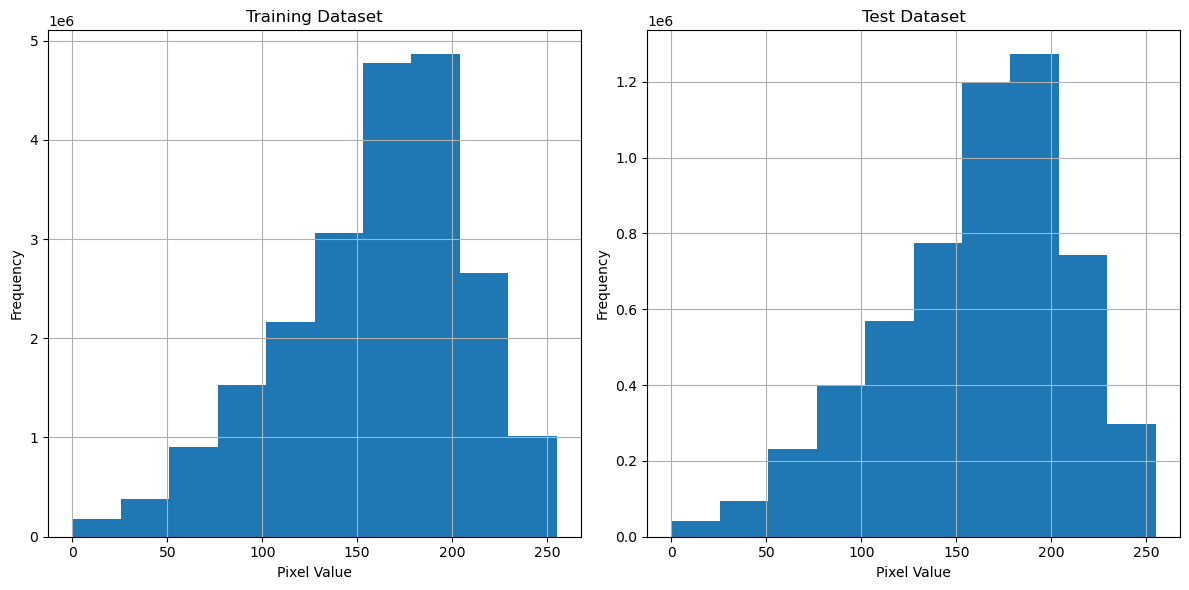

In [5]:
# Concatenate pixel values from both train and test datasets
pix_train = pd.Series(train_data.values.reshape(-1))
pix_test = pd.Series(test_data.values.reshape(-1))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram and display descriptive statistics for training dataset
pix_train.hist(ax=axes[0])
axes[0].set_title('Training Dataset')
axes[0].set_xlabel('Pixel Value')
axes[0].set_ylabel('Frequency')

# Plot histogram for test dataset
pix_test.hist(ax=axes[1])
axes[1].set_title('Test Dataset')
axes[1].set_xlabel('Pixel Value')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

On these graphs, we wanted to observe and visualize the value of the pixels of both datasets. As observe, both are equally distributed holding most pixel values between 150-225

Train pixel descriptive stats count    2.152472e+07
mean     1.592910e+02
std      4.876951e+01
min      0.000000e+00
25%      1.300000e+02
50%      1.670000e+02
75%      1.940000e+02
max      2.550000e+02
dtype: float64

Test pixel descriptive stats count    5.622848e+06
mean     1.605711e+02
std      4.904256e+01
min      0.000000e+00
25%      1.300000e+02
50%      1.690000e+02
75%      1.960000e+02
max      2.550000e+02
dtype: float64


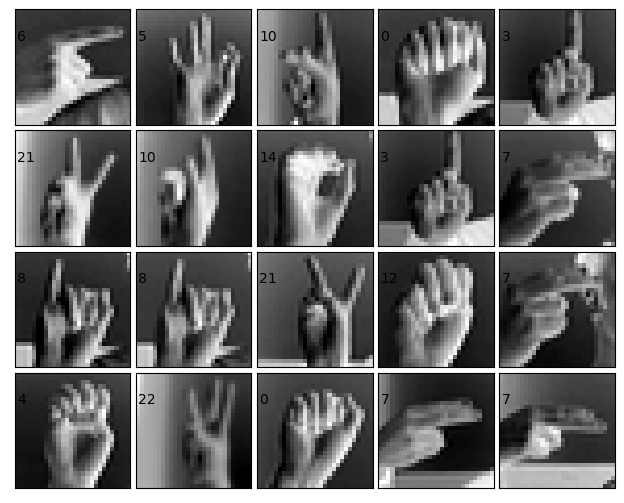

In [6]:
# Display descriptive statistics for train dataset
print(f'Train pixel descriptive stats {pix_train.describe()}')
# Display descriptive statistics for test dataset
print(f'\nTest pixel descriptive stats {pix_test.describe()}')

# examples of the raw data

fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(20):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    # data is 28 x 28 pixels, grayscale
    ax.imshow(test_data.loc[i].to_numpy().reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(test.label.loc[i]))

We also printed out the descriptive statistics of the graphs as well as printing out and visualizing the raw data to give us an idea how these images look like

### CNN - Results
Our CNN gave us, by far, the best results. As has been stated before, supervised algorithms are better for image recognition. CNNs in particular are excellent (and mainly used) for image recognition, so the results didn't surprise us all too much. 

In [7]:
# data re-do
extract_test = test.drop(columns="label")
test_data = extract_test.values
test_labels = test.get("label")

extract_forkmeans = train.drop(columns="label")
data = extract_forkmeans.values

In [8]:
# initialize model

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)  

cpu


In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 15, 3, 1, 1)
        self.pool = nn.AvgPool2d(2, 2)
        self.conv2 = nn.Conv2d(15, 20, 3,1,1)
        self.conv3 = nn.Conv2d(20, 20, 3,1,1)
        self.fc1 = nn.Linear(180, 100)
        
        self.fc3 = nn.Linear(100, 26)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc3(x)
        
        return x
    
    
net = Net()     
net.to(device)  

Net(
  (conv1): Conv2d(1, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(15, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=180, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=26, bias=True)
)

In [10]:
loss_func = nn.CrossEntropyLoss()  
opt = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) 

In [11]:
labels = np.array(train.get("label"))

In [12]:
# train cnn
data_tensor = torch.Tensor(data).view(-1, 1, 28, 28)  
labels_tensor = torch.Tensor(labels).long().squeeze()  


dataset = TensorDataset(data_tensor, labels_tensor)
data_loader = DataLoader(dataset, batch_size=4, shuffle=True)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_vals = []
num_epochs = 10  
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(data_loader, 0):
        
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        
        optimizer.zero_grad()

        
        outputs = net(inputs)

        
        loss = criterion(outputs, labels)

        
        loss.backward()
        optimizer.step()
        
        

        
        running_loss += loss.item()
        if i % 3000 == 0 and i != 0:
            loss_vals.append(running_loss/3000)
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 3000))
            running_loss = 0.0

print('Finished Training')

[1,  3001] loss: 0.820
[1,  6001] loss: 0.158
[2,  3001] loss: 0.091
[2,  6001] loss: 0.073
[3,  3001] loss: 0.067
[3,  6001] loss: 0.046
[4,  3001] loss: 0.059
[4,  6001] loss: 0.046
[5,  3001] loss: 0.039
[5,  6001] loss: 0.042
[6,  3001] loss: 0.048
[6,  6001] loss: 0.022
[7,  3001] loss: 0.058
[7,  6001] loss: 0.024
[8,  3001] loss: 0.033
[8,  6001] loss: 0.018
[9,  3001] loss: 0.047
[9,  6001] loss: 0.035
[10,  3001] loss: 0.025
[10,  6001] loss: 0.035
Finished Training


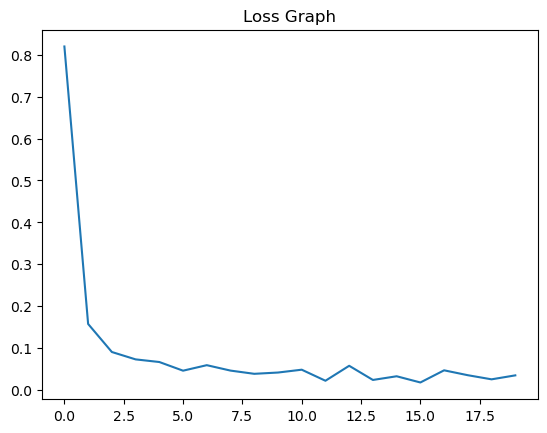

In [13]:
plt.plot(loss_vals)
plt.title("Loss Graph")
plt.show()

In [14]:
# get accuracy and classification report
test_data_tensor = torch.Tensor(test_data).view(-1, 1, 28, 28)
test_labels_tensor = torch.Tensor(test_labels).long().squeeze()

test_dataset = TensorDataset(test_data_tensor, test_labels_tensor)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

net.eval()  
correct = 0
total = 0

true_labels = []
predicted_labels = []

with torch.no_grad():  
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        
        outputs = net(images)

        
        _, predicted = torch.max(outputs.data, 1)

        
        total += labels.size(0)

        
        correct += (predicted == labels).sum().item()
        
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

accuracy = 100 * correct / total
print(f'Accuracy : {accuracy:.2f}%')

# conv to numpy array
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

print(classification_report(true_labels, predicted_labels))

Accuracy : 91.79%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       331
           1       0.99      0.97      0.98       432
           2       1.00      0.93      0.96       310
           3       1.00      0.97      0.98       245
           4       0.96      0.96      0.96       498
           5       0.99      0.98      0.99       247
           6       0.92      0.78      0.84       348
           7       1.00      0.86      0.93       436
           8       0.90      0.92      0.91       288
          10       0.94      0.77      0.85       331
          11       1.00      1.00      1.00       209
          12       0.84      0.94      0.89       394
          13       0.81      0.93      0.87       291
          14       1.00      0.91      0.95       246
          15       0.80      1.00      0.89       347
          16       1.00      0.98      0.99       164
          17       0.79      0.81      0.80       144
         

In [15]:
ari_cnn = adjusted_rand_score(true_labels, predicted_labels)
print("Adjusted Rand Index:", ari_cnn)

Adjusted Rand Index: 0.8451652114910222


### CNN - Discussion
CNN delivered the best accuracy and classification evaluation metrics of our two supervised machine learning models. Of note, label 17/the letter 'R' had far better performance with the CNN than it did with SVM. While there are instances where some evaluation metrics are lower in CNN vs SVM, across the board, CNN gave us better results. We beleive this is due to the CNN's architecture utilizing multiple filters to extract features of the input image and then creating a meaningful compression of the image before feeding it into the neural network. The structure is particularly effective for image classification and thus is why we believe we saw such accurate results.

### GMM - Results
- Files are in gmm_traindata and gmm_testdata in the parent repository.

We decided to utilize ARI, RI, AIC, BIC, and Silhouette Score regarding GMMs in order to gauge the efficacy of the Sign Language MNIST dataset for ASL. The extended code and analysis is in the aforementioned gmm_traindata and gmm_testdata: the metrics are summarized below. Although this small section deals with only the "train" dataset, we also did work on the "test" dataset as well, linked up top. Of note, we also tried standardizing the data for GMMs, noted by "scaled_predicted". In the interest of time, we decided to just print out values in our final report. As stated earlier, all other information is within the two files. We decided to use the training data from the dataset for our GMM's purposes; this came from a GMM of 5 components.

In [16]:
adjusted_rand_nonscaled = 0.04676689255258681
non_adjusted_rand_nonscaled = 0.7703969635432097
adjusted_rand_scaled = 0.023481092716432513
non_adjusted_rand_scaled = 0.769771644446842
aic = 104560606.05819455
scaled_aic = -59301488.58365816
bic = 117240621.61718772
scaled_bic = -46621473.02466498
silhouette_nonscaled = 0.02272728942562161
silhouette_scaled = 0.004961856247034123

# NON-SCALED
print("Non-scaled Adjusted Rand Score:", adjusted_rand_nonscaled)
print("Non-scaled Non-Adjusted Rand Score:", non_adjusted_rand_nonscaled, '\n')

# SCALED
print("Scaled Adjusted Rand Score:", adjusted_rand_scaled)
print("Scaled Non-Adjusted Rand Score:", non_adjusted_rand_scaled, '\n')

# aic
print("aic:", aic)
print("scaled_aic:", scaled_aic, '\n')

# bic
print("bic:", bic)
print("scaled_bic:", scaled_bic, '\n')

# silhouette score
print("silhouette_nonscaled:", silhouette_nonscaled)
print("silhouette_scaled:", silhouette_scaled)

Non-scaled Adjusted Rand Score: 0.04676689255258681
Non-scaled Non-Adjusted Rand Score: 0.7703969635432097 

Scaled Adjusted Rand Score: 0.023481092716432513
Scaled Non-Adjusted Rand Score: 0.769771644446842 

aic: 104560606.05819455
scaled_aic: -59301488.58365816 

bic: 117240621.61718772
scaled_bic: -46621473.02466498 

silhouette_nonscaled: 0.02272728942562161
silhouette_scaled: 0.004961856247034123


### GMM - Discussion

At first glance, our scores were, across the board, very poor, so we also tried scaling the data to see if it'd make any difference; we didn't expect much, and didn't get much. 

While the non-adjusted Rand scores looked promising for GMM, the adjusted Rand scores were quite bad, at below 0.05 for both the scaled and non-scaled data. This pattern continued with our AIC, BIC, and Silhouette scores: they were all quite horrific. After trying various values of "n_components" as well as trying GMM on the test dataset as well, we came to the conclusion that using GMM was a poor fit for our dataset.

### K-Means - Results

#### Cluster Visualisation Results 
![k_means_clusters.png](data/img/k_means_clusters.png)
#### Evaluation metric results: 

Silhouette Score: 0.0600

Adjusted Rand Index: 0.0708
(Refer to file k_means.ipynb for full code)

Amongst all our models, K-Means clustering seems to have performed the worst, struggling significantly to identify variations in different hand-signs. The PCA-reduced visualization shows considerable overlap among the clusters, hinting at a poor distinction between the different signs. This is further corroborated by the silhouette score of 0.0600, indicating that many data points are not well-matched to their own cluster and are closer to neighboring clusters, pointing to inadequately separated groupings. Additionally, an ARI of 0.0708 suggests that the clustering assignments have a very slight alignment with the actual labels of the dataset, further implying that the model’s classification of the ASL MNIST data is largely inaccurate. These metrics reveal that K-Means, while simple and efficient for certain applications, may not be complex enough to capture the nuanced differences required for classifying the rich variations within ASL signs.

### SVM - Results
We utilized PCA and and SVM next: this gave us better results than K-Means and GMM but not as good as CNN. This was to be expected, as SVM is a supervised algorithm, which is usually more accurate for our current purposes (image recognition). We did further analysis in the analysis.ipynb file.

In [17]:
# Separate features (pixels) and labels (alphabet)
X_train = train.drop('label', axis=1)
y_train = train['label']

X_test = test.drop('label', axis=1)
y_test = test['label']

# Normalize pixel values to range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

svm = SVC(kernel='rbf', gamma='scale', C=1.0)
svm.fit(X_train_pca, y_train)

# Predict labels for test data
y_pred = svm.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))

# Perform  PCA on test data
X_test_data_pca = pca.transform(X_test)

Accuracy: 0.8531790295593976
              precision    recall  f1-score   support

           0       0.91      1.00      0.96       331
           1       1.00      0.97      0.99       432
           2       0.85      0.99      0.92       310
           3       0.92      1.00      0.96       245
           4       0.95      1.00      0.97       498
           5       0.75      0.83      0.79       247
           6       0.94      0.91      0.92       348
           7       0.97      0.95      0.96       436
           8       0.80      0.90      0.85       288
          10       0.79      0.68      0.73       331
          11       0.87      0.97      0.92       209
          12       0.86      0.75      0.80       394
          13       0.90      0.69      0.78       291
          14       0.99      0.85      0.91       246
          15       1.00      1.00      1.00       347
          16       1.00      0.99      1.00       164
          17       0.33      0.61      0.43       14

In [18]:
ari = adjusted_rand_score(y_test, y_pred)
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 0.7700798573850628


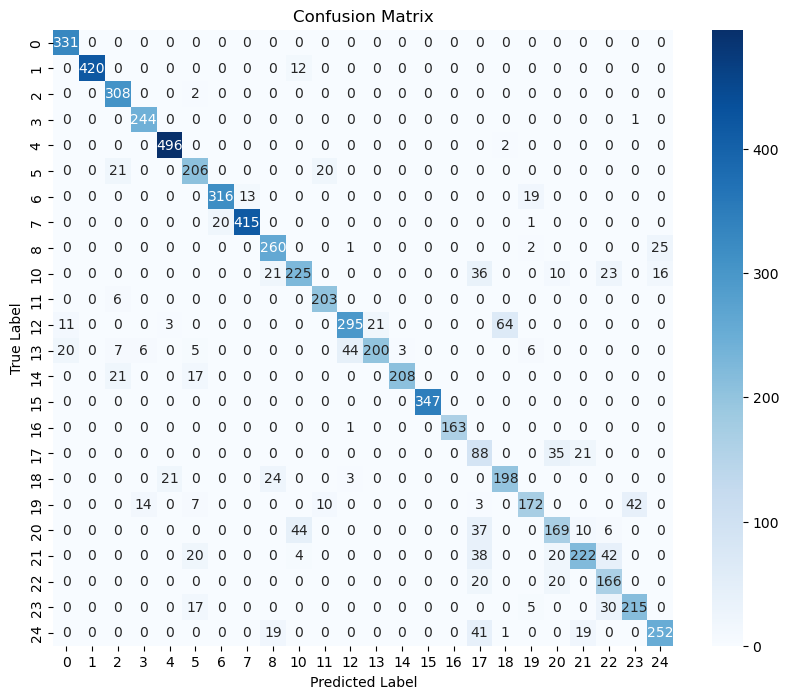

In [19]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### SVM - Discussion
As is evident from the get-go, SVM performs considerably better than K-Means and GMM. Especially with regards to GMM, our ARI was over 15 times higher. This is also evident with what we see in our classification report averages: our macro and weighted averages for precision, recall, and f1-score are relatively high, as well as our accuracy and confussion matrix. Of interesting note: label 17, or the letter "R", struggled a lot, with the lowest scores across all classification categories.

### Limitations  

We wouldn't say that there were any inherent problems with the work, but we did have a feeling beforehand that the supervised algorithms would perform better than the unsupervised algorithms for our purposes (image recognition), but we were somewhat surprised at just how poorly they performed with our MNIST drop-in dataset. 

In this instance, we'd say that more data (at least, in regards to image recognition) would not change the nature of the problem. In most cases, CNN algorithms/CNN models will always have great performance at image recognition, as well as SVM (not to the same extent). Adding more data won't change the general predicted outcome.

We believe that exploring additional hyperparameters, had we had more time, would be interesting but wouldn't make a large difference in terms of model performance.

### Ethics & Privacy

Our American Sign Language recognition research project utilises the MNIST dataset of hand signs. Even though this dataset has been fairly corroborated and extensively updated over the years; since our project has an application in helping the "hard of hearing", it's necessary to consider some possible ethical concerns:

1. Clustering Algorithm Bias: The MNIST training data might lack diversity in hand shapes, skin tones, signing styles, or individual variations, resulting in the algorithm prioritising majority patterns, leading to inaccurate classifications for underrepresented groups. For instance, a dataset skewed towards younger signers might struggle with recognizing signs used more frequently by older adults. In addition to this, even with a perfect algorithm also, there might be implicit biases in the dataset which are being amplified by our clustering algorithm.For example, the data might contain more examples of right-handed signing, potentially impacting the model's ability to recognize signs performed with the left hand. While such conclusions are less often, they are important to take under consideration because the implications of such biases are significant. Misclassifications can lead to communication breakdowns, and misunderstandings, all of which on an extended period and a larger sample space may even lead to social exclusion for specific groups within the Deaf community. We aim to address these concerns by trialling and testing the usage of different clustering algorithms to mitigate the risk of false clustering. Hierarchical clustering, for instance, builds a hierarchy of clusters, allowing me to zoom in on specific signing styles or hand shapes potentially underrepresented in the data. Similarly, density-based methods like DBSCAN focus on identifying clusters based on data density, making them less susceptible to the influence of majority patterns that could amplify bias. By evaluating these alternative algorithms with diverse test sets and fairness metrics (accuracy, precision and F1 score), we will choose the model that best balances inclusivity and accuracy, ensuring equitable representation across all user groups.

2. Data Privacy Issue: The MNIST Hand Sign dataset we are utilising contains 27,455 cases of test data. These are real-life pictures collected from different thousands of different people. Now, in high-security stakes, hand-pictures also serve as identifiers. Due to this reason, similar to any other dataset, our MNIST ASL dataset is also subject to the protection of the privacy of individuals. In addition to this, we will also have input data from voluntary non-ASL communicators to test the real-time interpretation feature of the app. We hope to address this by keeping the identity of the volunteers undisclosed. In addition, we do it by utilising a "black-box" way of allowing the user to interact with the model. Without giving them any information about existing ASL hand signs, we hope to test the model for its accuracy in identifying any or all signs that people make, closest to an actual ASL sign.

### Conclusion

Our main conlcusion is that supervised machine learning such as CNN with accuracy = 92%, outperform unsupervised machine learning tools such as Kmean with an accuracy of less than 15% or GMM which we did not explicitly calculate accuracy for it but GMM is already inherently bad for image recognition, and the statistics we currently have prove this. Our best solution was from CNN which have similar accuracy that the Benchmark proposed. We have implemented an app to import our model and other models to accurately predict the ASL in real-life time to help those in need or to practice in learning ASL. Considering future approaches will be to create new models that can better predict the ASL in real-time while using the camera app. As we can see from our video demostration [link](https://drive.google.com/file/d/1B8pK6kC_L6N77hL29prMd8H7gnXqXOuY/view?usp=sharing), there are some discrepancy in correctly predicting the right letter since some of them, like M and N or A and E are almost identical whereas Y and X are always predicted perfectly.

# Footnotes

<a name="onenote"></a>1.[^](#one): Ashley Chow, Glenn Cameron, Manfred Georg, Mark Sherwood, Phil Culliton, Sam Sepah, Sohier Dane, Thad Starner. (2023). Google - American Sign Language Fingerspelling Recognition. Kaggle. https://kaggle.com/competitions/asl-fingerspelling<br> 

<a name="twonote"></a>2.[^](#two): El Moujahid, K. (2021, December 1). Machine learning to make sign language more accessible. Google. https://blog.google/outreach-initiatives/accessibility/ml-making-sign-language-more-accessible/<br> 

<a name="threenote"></a>3.[^](#three): Garimella, M. (2022, August 23). Sign Language Recognition with Advanced Computer Vision. Medium. https://towardsdatascience.com/sign-language-recognition-with-advanced-computer-vision-7b74f20f3442<br> 

<a name="fournote"></a>4.[^](#four): tecperson. (October 2017). Sign Language MNIST. Kaggle. https://www.kaggle.com/datasets/datamunge/sign-language-mnist<br> 

<a name="fivenote"></a>5.[^](#five): Pathan, R. K., Biswas, M., Yasmin, S., Khandaker, M. U., Salman, M., & Youssef, A. A. F. (2023). Sign language recognition using the fusion of image and hand landmarks through multi-headed convolutional neural network. Scientific Reports, 13(1), 16975. https://doi.org/10.1038/s41598-023-43852-x<br> 

<a name="sixnote"></a>6.[^](#six): Chen, Y. (2023, December 29). Learning American Sign Language (ASL) with Google’s Teachable Machine: A No-Code Experiment. Medium. https://medium.com/@dynotes/breaking-barriers-using-googles-no-code-approach-for-sign-language-recognition-and-learning-fc92ae16522c#bypass<br> 

"<a name="MLTeaching"></a>7.[^](#MLTeachingNote) Google open Teachable Machine. https://teachablemachine.withgoogle.com/train/tiny_image"
